In [ ]:
#for loading insurance.csv file from pc to google colab
from google.colab import files
uploaded=files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
import pandas as pd   #for reading the file
import numpy as np
import io   #as file is in google colab we are using it
df=pd.read_csv(io.BytesIO(uploaded['insurance.csv']))   #taking permission of io for reading as it is in google colab
#uploaded is a variable name where we have uploaded the file
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, we have to predict the charges based on the features data.

Charges is our target.

and

Age, bmi etc. are our features.

In [ ]:
#If we are working on juypter notebook software and our file is in our PC
#we can upload the file using
#df=pd.read_csv("C://...Complete file path....")

These are some more methods using which we can get more info. about our dataset :

-> describe() - descibes some of the statictical measures of our dataset like count, mean, standard deviation(std) etc.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


-> shape - for knowing the shape of our dataset (rows, cloumns)

In [ ]:
df.shape

(1338, 7)

-> info() - it gives total info. of our dataset including types of data

(object in our o/p means string)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


-> isnull().sum() - gives us the total count of null values in our data is there are any.

(we can check null values using this method, or above info() method by observing its o/p)

In [ ]:
df.isnull().sum()
#isnull() gives us whether the value is null or not
#sum() gives us sum of all null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical data : In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.

Now we want to apply any of the preprocessing techniques which we studied.

Our preprocessing techniques are statistical methods, and we can only apply them on numerical data.

We can't apply preprocessing techniques on Categorial data (object i.e. string or a given range of data.
For ex: children column in above table, it is showing int type , but it is a categorical data as a person is divided in categories i.e. have 0 child, 1 child, 2...and so on) 

So we have to convert categorical data to numerical data so that we can apply any preprocessing technique.

Ex: Here, in this dataset, a person can have max. 5 children..so we'll convert no. of children in different categories(dummy variables column), like if 1child, 2 child, 3child..so on.

If a person have 0 child then 0child column will have 1 value and other columns will have 0value.

Similarly, other categorical value columns of the dataset will be divided in dummy variables (i.e. sex, children, smoker, region).

No. of dummy variables for a single categorial value column will be depend on no. of categories i.e. for sex -male, female.. these are 2 categories..so no. of dummy variable column will be 1...if male then value will be 1...if female value will be 0.

# Method-1: (One hot encoding)

In [ ]:
categorical_names=['sex','smoker','region','children']  #assigning the categories

#df_encoder is a variable name
#assigning data, name to dummy variables 
df_encoder=pd.get_dummies(data=df, prefix='OHE', prefix_sep='_', columns=categorical_names, drop_first=True, dtype='int8')
#drop_first means dropiing the forst dummy column i.e. in case of sex, female is considered 1st column and it is dropped
#and male is used for assigning values

df_encoder  #revised dataset

,age,bmi,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5
0,19,27.900,16884.92400,0,1,0,0,1,0,0,0,0,0
1,18,33.770,1725.55230,1,0,0,1,0,1,0,0,0,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,1,0,0
3,33,22.705,21984.47061,1,0,1,0,0,0,0,0,0,0
4,32,28.880,3866.85520,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,1,0,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,1,0,0,0,0,0,0
1336,21,25.800,2007.94500,0,0,0,0,1,0,0,0,0,0


OHE_male, OHE_yes, OHE_northwest etc are dummy variables.

Lets see region dummy variables : OHE_northwest, OHE_southeast, OHE_southwest... if all these column values are zero that means person belongs to northeast region.

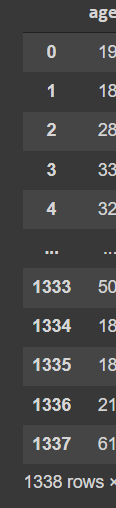

0,1,2,3 represents people i.e. person 1, person 2..so on

Now we can see that dummy variables create a sparse matrix:
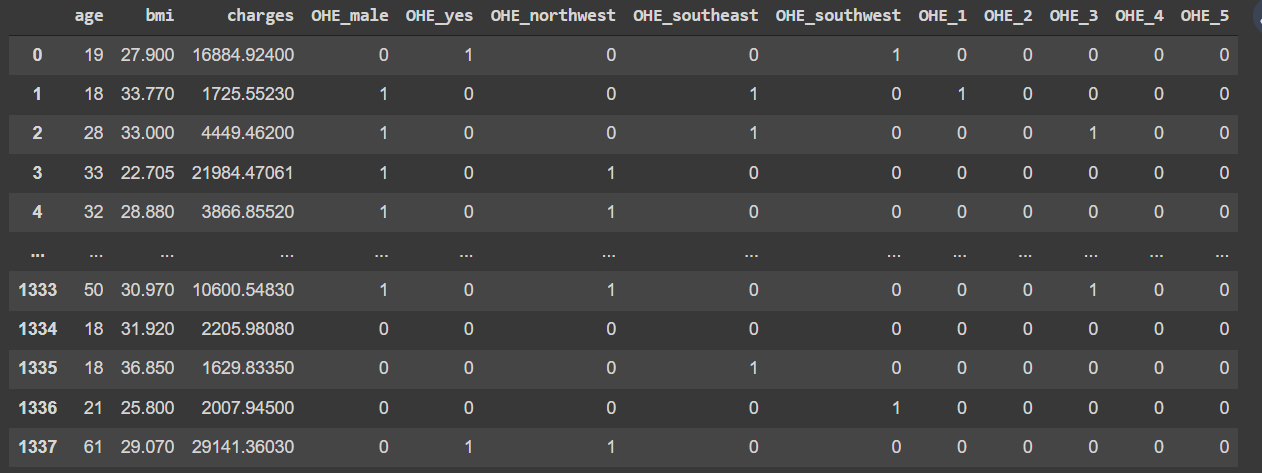

And we know that when machine computes values using sparse matrix.. computation time is much lower as compared to a matrix containing different values.

For ex: children column have values 0, 1, 2, 3, 4, 5 in orginial dataset.
But now we have created dummy variables and these contains only 0,1 .. and as machine always prefer data in 0,1 form i.e. why computation will be faster in case of dummy variables as compare to column containng diff. values.

# -> it is not compulsory to convert int categorical data into dummy variables , but to make computation faster we should do it.

In [10]:
#df_encoder (name of revised dataset i.e. including dummy variables)

df_encoder

,age,bmi,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5
0,19,27.900,16884.92400,0,1,0,0,1,0,0,0,0,0
1,18,33.770,1725.55230,1,0,0,1,0,1,0,0,0,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,1,0,0
3,33,22.705,21984.47061,1,0,1,0,0,0,0,0,0,0
4,32,28.880,3866.85520,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,1,0,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,1,0,0,0,0,0,0
1336,21,25.800,2007.94500,0,0,0,0,1,0,0,0,0,0


#Here, in above table we can see that our TARGET(charges) is also includes.
Therefore, we have to spearate or features and target.

In [11]:
X=df_encoder.drop(['charges'], axis=1)  #axis=1 means all the column values
y=df_encoder['charges']
print(X.shape, y.shape)

# after dropping charges in X
# X have only features
# y have only target

(1338, 12) (1338,)


-> We have separated target & features as we'll apply data preprocessing tecniques only in features ..not in target as we can't change our target.

# -> we can use any data preprocessing technique.. here we have used StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_new=scaler.fit_transform(X)
X_new

array([[-1.43876426, -0.45332   , -1.0105187 , ..., -0.3646069 ,
        -0.13798683, -0.11677484],
       [-1.50996545,  0.5096211 ,  0.98959079, ..., -0.3646069 ,
        -0.13798683, -0.11677484],
       [-0.79795355,  0.38330685,  0.98959079, ...,  2.74267989,
        -0.13798683, -0.11677484],
       ...,
       [-1.50996545,  1.0148781 , -1.0105187 , ..., -0.3646069 ,
        -0.13798683, -0.11677484],
       [-1.29636188, -0.79781341, -1.0105187 , ..., -0.3646069 ,
        -0.13798683, -0.11677484],
       [ 1.55168573, -0.26138796, -1.0105187 , ..., -0.3646069 ,
        -0.13798683, -0.11677484]])

#splitting data for training and testing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#(936, 12) (936,)
#(402, 12) (402,)
#(936,12)- 936 rows and 12 columns for training (features)  (936,)- target for training
#(402, 12)- 402 rows & 12 columns for testing (features)    (402,)-  target for testing 

(936, 12) (936,)
(402, 12) (402,)


# Supervised learing model is divided into 2:
1. Classification
2. Regression

(Some of the method can be both - regression & classification)

# 1. Classification
If we can to classify/recognize something we use classification


#2. Regression
if we want to predict something we'll use regression

---There areseveral regression methods... here we are applying Linear Regression method---

In [20]:
# here we are predicting insurance charge..so we'll use regression

# we are using Linear regression algo. to train the model.. using X_train and y_train
from sklearn.linear_model import LinearRegression
model= LinearRegression().fit(X_train,y_train)

#model is the variable name
# LinearRegression() apply the LinearRegression algo.
#we are fitting training data X_train, y_train

In [21]:
#testing the score of our model using test data

model.score(X_test,y_test)

0.7899899554426714

#-> Now, we'll predict the charges using new value

In [24]:
#here, y_pred is predicting the charges using X_test data
#as we know X_test contains testing features
#y_pred is predicting y_test values

y_pred=model.predict(X_test)
y_pred

array([11040.90216073,  9309.7829851 , 38393.60901442, 16015.93316861,
        6728.415514  ,  4030.66950914,  1612.94653689, 13764.35582297,
        8393.986819  ,  6868.81159022,  4204.68905213, 10707.48972423,
        8667.50264488,  3784.02365445, 27505.41205052, 10342.73632866,
       11086.52720575,  5955.15971261,  8632.74901443, 27003.67180132,
       33916.48844519, 14765.24767531, 11805.45931725, 31977.54987411,
        4098.78923853,  9097.0245239 ,  1164.53391788,  9399.85573894,
        3749.03832801, 10829.67068505,  8399.05186139, 39712.54747123,
       15715.57515859, 13895.98151471, 24668.18177497,  5212.1617842 ,
       13204.35343649, 30428.06543801, 33785.36966736,  3657.51573656,
        4058.80359505,  3946.96861054, 30431.1195646 , 39745.40015294,
       27575.63899905,  5454.5129915 , 10233.02862045,  7427.16831439,
        3493.33959801, 10069.81739446,  5731.33701091,  2787.34503345,
       32739.35954628, 37994.25700233, 16014.91886813,  7173.72658819,
      

In [25]:
#as we have predicted y_test values using y_pred
#and now, we are comparing y_test and y_pred values
#y_test are the actual values, y_pred is computed by our model

df=pd.DataFrame({'Real Values ':y_test, 'Predicted Values ':y_pred})
df

,Real Values,Predicted Values
578,9724.53000,11040.902161
610,8547.69130,9309.782985
569,45702.02235,38393.609014
1034,12950.07120,16015.933169
198,9644.25250,6728.415514
...,...,...
1261,3277.16100,7210.165861
494,17942.10600,28955.432017
97,10226.28420,14019.486941
418,14418.28040,16879.651813


-> After comparing y_test & y-pred we can see that the diff. b/w values is high,
therefore our model(Linear Regression model) is not performing good

#Reason can be for bad peformance :
1. The data preprocessing technique which we have used is not well suited for our task.. we should go for some other preprocessing technique.
2. We have taken 936rows (70% data) for training.. which might not be sufficient no. of rows for training the model in this case. We can increase the no. of training data for better performance.
3. In LinearRegression() we have not passed parameters.. and it might happen that by default values of parameter of LinearRegression() are not be working well for our model. For resolving this prob. can take diff. parameters for checking performance of our model.


---

#Decision tree algo.

Decision tree algo. is applicable in case of prediction as well as classification.

-> Taking Decision tree mathod for prediction

In [28]:
#our decision tree method name is DecisionTreeRegressor bcz. it is a regressor method

from sklearn.tree import DecisionTreeRegressor
model_DT= DecisionTreeRegressor().fit(X_train, y_train)
#fitting training data 
#DecisionTreeRegressor(), default parameters are passed in the method, we can also pass parameters as per our need

In [33]:
y_pred_DT=model_DT.predict(X_test)

In [30]:
#as we have predicted y_test values using y_pred_DT
#and now, we are comparing y_test and y_pred_DT values
#y_test are the actual values, y_pred_DT is computed by our model

df=pd.DataFrame({'Real Values ':y_test, 'Predicted Values ':y_pred_DT})
df

,Real Values,Predicted Values
578,9724.53000,9748.91060
610,8547.69130,8233.09750
569,45702.02235,44202.65360
1034,12950.07120,12741.16745
198,9644.25250,9264.79700
...,...,...
1261,3277.16100,3577.99900
494,17942.10600,16297.84600
97,10226.28420,20781.48892
418,14418.28040,31620.00106


-> Now by comparing we can see that diff. b/w predicted values and testing values tough we have taken default values of parameter are less as compare to LinearRegression

# -> It is very difficult to get exact same values of test & predicted data. 
We have to find a method so that the diff. b/w values of both is minimum.